In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy
from collections import Counter
import json
from tqdm import tqdm
import glob
import light_curve as lc
import ast
from tqdm import tqdm 

In [2]:
data_lc = pd.read_csv('/media3/darc/crp8_variability/notebooks/data_preparation/Data_CSV/DR_galactic_incomplete_final.csv')

In [3]:
data_gaia = pd.read_csv('/media3/darc/crp8_variability/notebooks/DR_gaia.csv')

In [4]:
data_gaia

,ztf_id,ra_mean_dr,dec_mean_dr,source,ID_gaia,classifier_gaia,class_gaia,classSc_gaia,ra_gaia,dec_gaia,GroupID,GroupSize,Separation
0,ZTF19aaxifvw,295.324234,40.326094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ZTF19aadosog,264.425380,-3.260064,4.368929e+18,3.753167e+17,nTransits:5+,LPV,0.610911,264.425361,-3.260082,1.0,3.0,0.093589
2,ZTF18actrkpz,112.869984,0.854739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZTF19abrkryh,288.278997,-22.143266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ZTF22aapkjuq,48.384165,61.270517,4.635905e+17,3.753167e+17,nTransits:5+,SOLAR_LIKE,0.531407,48.384180,61.270505,NaN,NaN,0.048173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40850,ZTF18abmmwds,322.235445,66.474263,2.221178e+18,3.753167e+17,nTransits:5+,YSO,0.717603,322.235440,66.474260,1952.0,2.0,0.010732
40851,ZTF19acabkwk,254.301940,-4.084825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40852,ZTF22ablxsvb,21.248236,70.617090,5.325425e+17,3.753167e+17,nTransits:5+,SOLAR_LIKE,0.276833,21.248250,70.617072,NaN,NaN,0.066977
40853,ZTF23aacgkuh,284.388522,31.103310,2.042032e+18,3.753167e+17,nTransits:5+,RS,0.811452,284.388514,31.103295,1385.0,3.0,0.060393


In [7]:
data_all0 = pd.merge(
    data_lc,
    data_gaia,
    on=['ztf_id', 'ra_mean_dr','dec_mean_dr'],  
    how='inner')                  


In [9]:
data_all0.columns, len(data_all0)

(Index(['Unnamed: 0', 'ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag',
        'magerr', 'band', 'catflags', 'source', 'ID_gaia', 'classifier_gaia',
        'class_gaia', 'classSc_gaia', 'ra_gaia', 'dec_gaia', 'GroupID',
        'GroupSize', 'Separation'],
       dtype='object'),
 40855)

In [10]:
data_all0 = data_all0[['ztf_id', 'ra_mean_dr', 'dec_mean_dr', 'mjd', 'mag',
        'magerr', 'band', 'catflags','source', 'ID_gaia', 'classifier_gaia',
        'class_gaia', 'classSc_gaia', 'ra_gaia', 'dec_gaia', 'GroupID',
        'GroupSize', 'Separation']]
data_all0['class_gaia']=data_all0['class_gaia'].fillna("Unknown")

/tmp/ipykernel_2999513/267793286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all0['class_gaia']=data_all0['class_gaia'].fillna("Unknown")


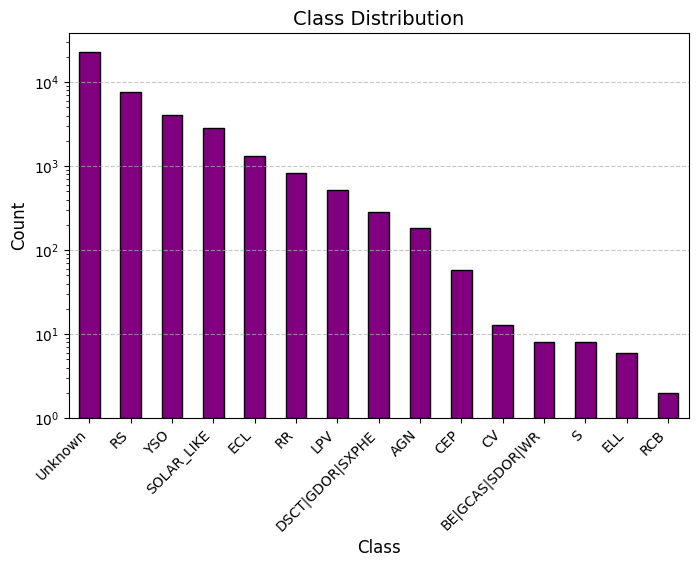

In [12]:
counts = data_all0['class_gaia'].value_counts()
counts
# Plot
plt.figure(figsize=(8,5))
counts.plot(kind="bar", color="purple", edgecolor="black", log=True)

plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [13]:
#data_all0.to_csv('/media3/darc/crp8_variability/notebooks/FINAL_DR_gaia_crossmatch_final_final.csv',index=False)